#============================================================================================================================================
# **Física Teórica 3 (Mecánica Estadística): Teórica 5 - Extras**
#============================================================================================================================================

# Gas Ideal
Este notebook modela un gas de esferas rígidas en dos dimensiones. Las partículas no interactúan entre sí excepto por choques elásticos. Cuando no interactúan, se desplazan en MRU. Tratamos los choques entre partículas intercambiando la velocidad de pares de partículas, cuando las partículas se acercan entre sí a una distancia menor a dos veces sus radios. Los choques con las paredes se tratan de dos formas: (1) Si las paredes no tienen agitación térmica, las partículas se reflejan y el sistema conserva la energía cinética total (microcanónico). (2) Si las paredes tienen agitación térmica, las partículas se reflejan y pueden ganar o perder energía como resultado del choque (canónico). Recordar que cada celda se debe ejecutar en orden, apretando SHIFT+ENTER:

Comenzamos definiendo diversos parámetros para el sistema:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Parámetros del sistema
N     = 3     # Número de partículas (>=2)
r     = .05   # Radio de las partículas
L     = 1     # Tamaño de la caja
m     = 1     # Masa de las partículas
E     = .01   # Energía cinética media total (inicial)
#swall = 0    # Dispersión de las fluctuaciones de las paredes (0=sistema a energía constante o en el microcanónico)
swall = .003  # Dispersión de las fluctuaciones de las paredes (0=sistema a energía constante o en el microcanónico)

# Parámetros para la simulación
step = 200  # Número total de pasos
jump = 2    # Número de pasos cada los cuales miramos la evolución

# Calculamos algunas cantidades necesarias para la simulación
sigma = np.sqrt(E/(N*m)) # Dispersión en la velocidad inicial de las partículas
dt    = r/sigma          # Paso temporal

# Creamos condiciones iniciales al azar. Las partículas están distribuidas espacialmente en forma uniforme, con velocidad inicial distribuida en forma normal
x  = np.random.uniform(0+r,L-r,N)
y  = np.random.uniform(0+r,L-r,N)
vx = np.random.normal(0,sigma,N)
vy = np.random.normal(0,sigma,N)

# Creamos vectores y matrices para almacenar la evolución temporal
time = np.arange(int(step/jump))*dt*jump
ener = np.zeros(int(step/jump))
px   = np.zeros((int(step/jump),2))
qx   = np.zeros((int(step/jump),2))

La siguiente celda realiza la simulación del gas de esferas rígidas:

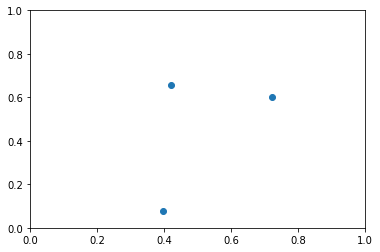

In [ ]:
# Evolucionamos el sistema en el tiempo
fig = plt.figure()
for k in range(0,step):
	x = x + vx*dt                                    # Evolucionamos la posición de las partículas según un MRU
	y = y + vy*dt
	# Tratamos los choques con las paredes: las partículas se reflejan y pueden ganar o perder energía por agitación térmica de la pared
	crash = np.where(x<0+r)                          # Choques con la pared de la derecha
	vx[crash] = -vx[crash] + np.random.normal(0,swall,np.size(crash))
	x[crash]  = 0+r
	crash = np.where(x>L-r)                          # Choques con la pared de la izquierda
	vx[crash] = -vx[crash] + np.random.normal(0,swall,np.size(crash))
	x[crash]  = L-r
	crash = np.where(y<0+r)                          # Choques con la pared de abajo
	vy[crash] = -vy[crash] + np.random.normal(0,swall,np.size(crash))
	y[crash]  = 0+r
	crash = np.where(y>L-r)                          # Choques con la pared de arriba
	vy[crash] = -vy[crash] + np.random.normal(0,swall,np.size(crash))
	y[crash]  = L-r
	for i in range(0,N):													   # Tratamos los choques entre partículas: las partículas intercambian velocidades (conservación del momento y la energía)
		for j in range(0,N):
			if (x[i]-x[j])**2+(y[i]-y[j])**2 < (2*r)**2:
				tmp   = vx[i]
				vx[i] = vx[j]
				vx[j] = tmp
				tmp   = vy[i]
				vy[i] = vy[j]
				vy[j] = tmp
	if k % jump == 0:																 # Cada 'jump' pasos calculamos la energía cinética, guardamos la posición y velocidad de algunas partículas, y graficamos la posición de las partículas
		ener[int(k/jump)] = .5*m*np.sum(vx**2+vy**2)   # Energía cinética total
		px[int(k/jump),:] = m*vx[0:2]                  # Impulso px para las primeras dos partículas
		qx[int(k/jump),:] = x[0:2]                     # Coordenada x para las primeras dos partículas
		plt.plot(x,y,'o')
		plt.xlim([0,L])
		plt.ylim([0,L])
		display.display(plt.gcf())
		display.clear_output(wait=True)
		plt.pause(0.01)

Graficamos la energía del sistema en función del tiempo:

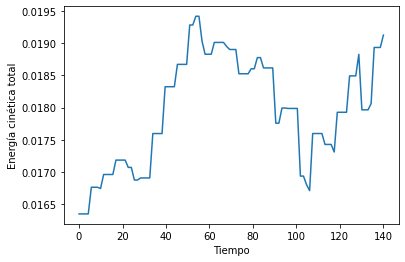

In [ ]:
plt.figure()
plt.plot(time,ener)
plt.xlabel(r'Tiempo')
plt.ylabel(r'Energía cinética total')
plt.show()

Calculamos el histograma de las componentes cartesianas de la velocidad de las partículas en el tiempo final:

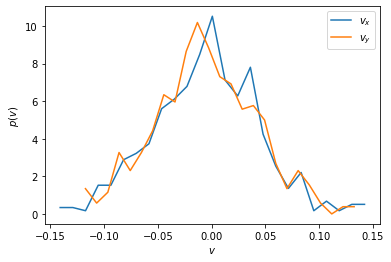

In [ ]:
hist1, bins1 = np.histogram(vx, density=True, bins=25)
hist2, bins2 = np.histogram(vy, density=True, bins=25)
plt.figure()
plt.plot(bins1[0:-1],hist1,label=r'$v_x$')
plt.plot(bins2[0:-1],hist2,label=r'$v_y$')
plt.legend(loc="upper right")
plt.xlabel(r'$v$')
plt.ylabel(r'$p(v)$')
plt.show()

Graficamos la evolución de dos partículas en el tiempo en un corte del espacio de fases:

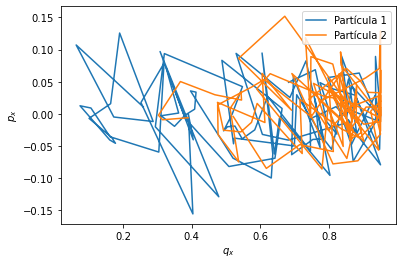

In [ ]:
plt.figure()
plt.plot(qx[:,0],px[:,0],label=r'Partícula 1')
plt.plot(qx[:,1],px[:,1],label=r'Partícula 2')
plt.legend(loc="upper right")
plt.xlabel(r'$q_x$')
plt.ylabel(r'$p_x$')
plt.show()

#———————————————————————————————————————————————————————————————————————————————————————————————

#———————————————————————————————————————————————————————————————————————————————————————————————